In [1]:
from carbon import CarbonSimulatorUI, CarbonOrderUI, P, __version__, __date__
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
print(f"Carbon v{__version__} ({__date__})")
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonOrderUI))

Carbon v2.1-BETA1 (14/Dec/2022)
CarbonOrderUI v1.4 (15/Dec/2022)


# Carbon Curves

## The CarbonOrderUI object

This curve `order1` is selling ETH for USDC, starting at 2000 USDC per ETH and ending at 3000. The curve has a capacity of 10 ETH (5 ETH for `order1b`), and it also is currently loaded with 10 ETH. The curve `order2` is selling USDC, starting at 1000 USDC per ETH and ending at 750. Capacity and loading is 20,000 USDC.

In [2]:
order1 = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 10)
order1b = CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000, 3000, 10, 5)
order2 = CarbonOrderUI.from_prices("ETH/USDC", "USDC", 1000, 750, 20000, 20000)

## Simple numeric properties

The prices are retrievable under a number of names: `p_start` and `p_end` to indicate the beginning and the end of the range, `px` and `py` to indicate the axis intersect to which they corresponds, and `pa` and `pb` simply in alphabetical order. 

In [3]:
order1.p_start, order1.p_end, order1b.p_start, order1b.p_end, order2.p_start, order2.p_end

(2000.0, 3000.0, 2000.0, 3000.0, 1000.0, 750.0000000000001)

In [4]:
order1.py, order1.px, order1b.py, order1b.px, order2.py, order2.px

(2000.0, 3000.0, 2000.0, 3000.0, 1000.0, 750.0000000000001)

In [5]:
order1.pa, order1.pb, order1b.pa, order1b.pb, order2.pa, order2.pb

(2000.0, 3000.0, 2000.0, 3000.0, 1000.0, 750.0000000000001)

The y-intercept `yint` correspond to the capacity of the curves, the y-value `y` to the current loading of the curve; those are expressed in `tkn`, also known as `tkny`. The x-intercept is the corresponding capacity in the other token `tknx`

In [6]:
order1.yint, order1b.yint, order2.yint

(10, 10, 20000)

In [7]:
order1.y, order1b.y, order2.y

(10, 5, 20000)

In [8]:
order1.tkny, order1b.tkny, order2.tkny

('ETH', 'ETH', 'USDC')

In [9]:
order1.xint, order1b.xint, order2.xint

(24494.897427831784, 24494.897427831784, 23.094010767585033)

In [10]:
order1.tknx, order1b.tknx, order2.tknx

('USDC', 'USDC', 'ETH')

The ratio `yint/xint` or `yint/xint` equals `p0` which is also the geometric average of the prices of the range; `p0` is always extressed in the quuote conventions of the pair.

In [11]:
order1.p0, order1b.p0, order2.p0

(2449.489742783178, 2449.489742783178, 866.0254037844387)

In [12]:
sqrt(order1.px*order1.py), sqrt(order1b.px*order1b.py), sqrt(order2.px*order2.py)

(2449.489742783178, 2449.489742783178, 866.0254037844387)

In [13]:
order1.xint/order1.yint, order1b.xint/order1b.yint, order2.yint/order2.xint

(2449.4897427831784, 2449.4897427831784, 866.0254037844386)

The current marginal price of the order is indicated by `p_marg`. If `y==yint` then `p_marg==p_start`, if `y==0` then `p_marg==p_end` and for `y` in between (as in `order1b`) it is in between.

In [14]:
order1.p_marg, order1b.p_marg, order2.p_marg

(2000.0, 2424.4923464074514, 1000.0)

## Functions

In [15]:
ETHr = np.linspace(0,order1.yint)
ETHr2 = np.linspace(0,order1b.y)
USDCr = np.linspace(0,order2.yint)

We first plot the invariant curves. We see that `order1` and `order1b` have the same curve, but `order2` is different, and the axis are reversed.

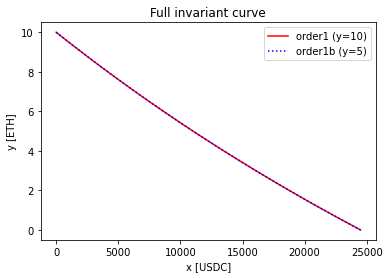

In [16]:
plt.plot([order1.xfromy_f(y) for y in ETHr], ETHr, label="order1 (y=10)", color="red")
plt.plot([order1b.xfromy_f(y) for y in ETHr], ETHr, label="order1b (y=5)", color="blue", linestyle="dotted")
plt.title("Full invariant curve")
plt.ylabel("y [ETH]")
plt.xlabel("x [USDC]")
plt.legend()

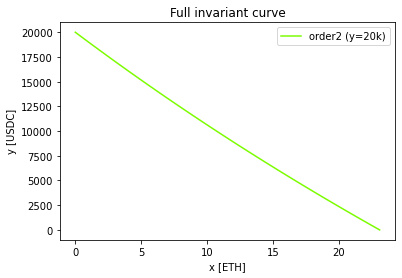

In [17]:
plt.plot([order2.xfromy_f(y) for y in USDCr], USDCr, label="order2 (y=20k)", color="lawngreen")
plt.title("Full invariant curve")
plt.ylabel("y [USDC]")
plt.xlabel("x [ETH]")
plt.legend()

The _active_ curve is the part of the curve that is reachable, ie below the current value of `y`. Initially we have `y==yint` so the full curve is active. But as we see in `order1b`, if `y<yint` the active part of the curve is smaller than the full curve.

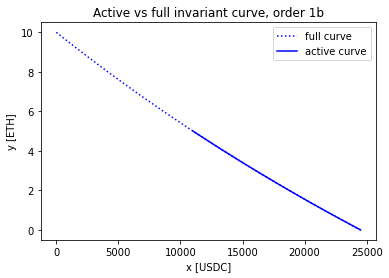

In [18]:
plt.plot([order1b.xfromy_f(y) for y in ETHr], ETHr, label="full curve", color="blue", linestyle="dotted")
plt.plot([order1b.xfromy_f(y) for y in ETHr2], ETHr2, label="active curve", color="blue")
plt.title("Active vs full invariant curve, order 1b")
plt.ylabel("y [ETH]")
plt.xlabel("x [USDC]")
plt.legend()

Here we see the swap curves, ie the change in `x`, `dx` for a given change in `y`, `dy` (the chart should be read therefore in reverse: the dependent variable is on the x-axis). The first chart is for the orders selling `ETH` and we recall that the curve in `order1b` is not entirely filled, which is why it stops in the middle.

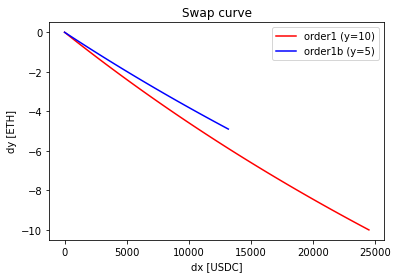

In [19]:
plt.plot([order1.dxfromdy_f(y, raiseonerror=False) for y in ETHr], -ETHr, label="order1 (y=10)", color="red")
plt.plot([order1b.dxfromdy_f(y, raiseonerror=False) for y in ETHr], -ETHr, label="order1b (y=5)", color="blue")
plt.title("Swap curve")
plt.ylabel("dy [ETH]")
plt.xlabel("dx [USDC]")
plt.legend()

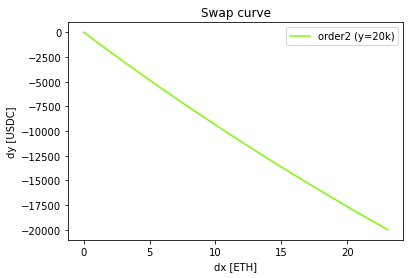

In [20]:
plt.plot([order2.dxfromdy_f(y, raiseonerror=False) for y in USDCr], -USDCr, label="order2 (y=20k)", color="lawngreen")
plt.title("Swap curve")
plt.xlabel("dx [ETH]")
plt.ylabel("dy [USDC]")
plt.legend()

In the below chart we show the marginal and effective prices for a given trade size. We have chosen `dx` as the independent variable here to keep the chart visually in line with the ones previously presented. The **marginal price** is the price (in USDC per ETH) at which the marginal unit of USDC is traded, ie _one dollar more_. The **effective price** is the average price of the entire trade, which corresponds to the average marginal price up to this point. Therefore, the effective prices curves are always flatter than the marginal price curves.

The curves for selling ETH are upwards sloping, corresponding to the fact that the first units are sold for fewer dollars than the later ones. The ones for buying ETH are downwards sloping, because the first units are bought more expensively.

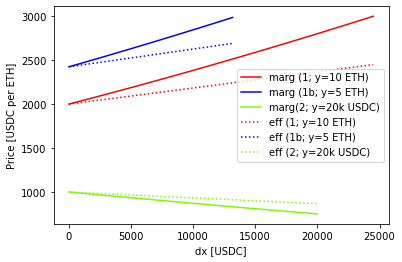

In [21]:
plt.plot(
    [order1.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order1.p_marg_f(dy, raiseonerror=False) for dy in ETHr], 
    label="marg (1; y=10 ETH)", color="red", linestyle="solid")
plt.plot(
    [order1b.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order1b.p_marg_f(dy, raiseonerror=False) for dy in ETHr], 
    label="marg (1b; y=5 ETH)", color="blue", linestyle="solid")
plt.plot(
    USDCr, 
    [order2.p_marg_f(dy, raiseonerror=False) for dy in USDCr], 
    label="marg(2; y=20k USDC)", color="lawngreen", linestyle="solid")
plt.plot(
    [order1.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order1.p_eff_f(dy, raiseonerror=False) for dy in ETHr], 
    label="eff (1; y=10 ETH)", color="red", linestyle="dotted")
plt.plot(
    [order1b.dxfromdy_f(dy, raiseonerror=False) for dy in ETHr], 
    [order1b.p_eff_f(dy, raiseonerror=False) for dy in ETHr], 
    label="eff (1b; y=5 ETH)", color="blue", linestyle="dotted")
plt.plot(
    USDCr, 
    [order2.p_eff_f(dy, raiseonerror=False) for dy in USDCr], 
    label="eff (2; y=20k USDC)", color="lawngreen", linestyle="dotted")
plt.ylabel("Price [USDC per ETH]")
plt.xlabel("dx [USDC]")
plt.legend(loc="center right")

## Trading

You can simulate trading (against a single curve) directly here. With `execute = False` the curve object itself is not changed. The command `selly` (when called with a positive `dy`) sells the y token of the curve. When called with a negative number, it buys this token. The outputs of this command are

      'y_old': 10                             # the previous amount of liquidity on curve         
      'y': 9                                  # ditto current
      'dy': 1                                 # the liquidity change in token y (positive=SELL)
      'yint_old': None                        # the old curve capacity
      'y_int': 10                             # the current curve capacity
      'expanded': False                       # whether the curve capacity has been expanded
      'x': 2037.3867433374953                 # the implied virtual x liquidity on curve
      'dx': 2037.3867433374958                # the liquidity change in token x (positive=BUY)
      'tkny': 'ETH'                           # name of token y
      'tknx': 'USDC'                          # name of token x
      'tx': 'Sell 1 ETH buy USDC'             # the transaction as text
      'dx/dy': 2037.3867433374958             # the ratio dx/dy (effective price)
      'dy/dx': 0.0004908248290463863          # the ratio dy/dx (effective price; inverse quotattion)
      'pmarg_old': 2000.0                     # the marginal price before the trade, in canonic quote direction
      'pmarg': 2075.472370963683              # ditto after the trade
      'p': 2037.3867433374958                 # the effective price of the trade, in canonic quote direction

In [22]:
order1.selly(1, execute = False)

{'y_old': 10,
 'y': 9,
 'dy': 1,
 'yint_old': None,
 'y_int': 10,
 'expanded': False,
 'x': 2037.3867433374953,
 'dx': 2037.3867433374958,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 1 ETH buy USDC',
 'dx/dy': 2037.3867433374958,
 'dy/dx': 0.0004908248290463863,
 'pmarg_old': 2000.0,
 'pmarg': 2075.472370963683,
 'p': 2037.3867433374958}

In [23]:
order1.selly(2, execute = False)

{'y_old': 10,
 'y': 8,
 'dy': 2,
 'yint_old': None,
 'y_int': 10,
 'expanded': False,
 'x': 4152.395764007314,
 'dx': 4152.395764007314,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 2 ETH buy USDC',
 'dx/dy': 2076.197882003657,
 'dy/dx': 0.00048164965809277256,
 'pmarg_old': 2000.0,
 'pmarg': 2155.2988226182356,
 'p': 2076.197882003657}

In [24]:
order1.buyx(1000, execute = False)

{'y_old': 10,
 'y': 9.50454587628476,
 'dy': 0.4954541237152398,
 'yint_old': None,
 'y_int': 10,
 'expanded': False,
 'x': 999.9999999999992,
 'dx': 1000.0,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 0.4954541237152398 ETH buy USDC',
 'dx/dy': 2018.3503419072274,
 'dy/dx': 0.0004954541237152398,
 'pmarg_old': 2000.0,
 'pmarg': 2036.869051338511,
 'p': 2018.3503419072274}

In [25]:
order1.buyx(2000, execute = False)

{'y_old': 10,
 'y': 9.018019674715147,
 'dy': 0.9819803252848526,
 'yint_old': None,
 'y_int': 10,
 'expanded': False,
 'x': 2000.0000000000016,
 'dx': 2000.0,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Sell 0.9819803252848526 ETH buy USDC',
 'dx/dy': 2036.7006838144548,
 'dy/dx': 0.0004909901626424263,
 'pmarg_old': 2000.0,
 'pmarg': 2074.0748377251334,
 'p': 2036.7006838144548}

With `execute = True` (default), the order object is changed

In [26]:
order_ = CarbonOrderUI.from_order(order1)
print(f"y={10-1-2+1.5}")
order_.selly(1)
order_.selly(2)
order_.selly(-1.5)

y=8.5


{'y_old': 7.0,
 'y': 8.5,
 'dy': -1.5,
 'yint_old': None,
 'y_int': 10.0,
 'expanded': False,
 'x': 3084.9138354523297,
 'dx': -3264.635360664166,
 'tkny': 'ETH',
 'tknx': 'USDC',
 'tx': 'Buy 1.5 ETH sell USDC',
 'dx/dy': 2176.4235737761105,
 'dy/dx': 0.00045946938456699067,
 'pmarg_old': 2239.8208329946465,
 'pmarg': 2114.8207493700456,
 'p': 2176.4235737761105}

## Order book calculations

First we create a staggered list of 10 orders. Note that all those orders are only half-filled. The corresponding marginal prices are shown in the printout.

In [27]:
orders = [
    CarbonOrderUI.from_prices("ETH/USDC", "ETH", 2000+50*i, 2500+50*i, 10, 5)
    for i in range(10)
]
for o in orders:
    print(f"y={o.y} pa={round(o.pa,0)} pb={round(o.pb,0)}  pmarg={round(o.p_marg,1)}")
margp = [o.p_marg for o in orders]
min(margp), max(margp)

y=5 pa=2000.0 pb=2500.0  pmarg=2229.1
y=5 pa=2050.0 pb=2550.0  pmarg=2279.6
y=5 pa=2100.0 pb=2600.0  pmarg=2330.0
y=5 pa=2150.0 pb=2650.0  pmarg=2380.4
y=5 pa=2200.0 pb=2700.0  pmarg=2430.8
y=5 pa=2250.0 pb=2750.0  pmarg=2481.2
y=5 pa=2300.0 pb=2800.0  pmarg=2531.6
y=5 pa=2350.0 pb=2850.0  pmarg=2581.9
y=5 pa=2400.0 pb=2900.0  pmarg=2632.3
y=5 pa=2450.0 pb=2950.0  pmarg=2682.6


(2229.1236000336485, 2682.6140015319056)

We are now looking at the dy released if the market moves to 2100. Those are all 0, because all positions are already beyond 2100 (as we can see above, the lowest marginal prices is about 2229)

In [28]:
[o.dyfromp_f(2100) for o in orders]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

If markets go all the way to 3000 -- which is above the upper end of the highest range which is at 2950 -- we see that all positions release their 5 ETH.

In [29]:
[o.dyfromp_f(3000) for o in orders]

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

For 2300 we see that only the first two positions contribute -- they release 1.39 and 0.40 ETH respectively. The current marginal price of the 3rd position is about 2330 which is already to high, and the other ones are even higher. If the market goes to 2500, the 1st position is fully used up, and the the next 4 position partially.

In [30]:
[round(o.dyfromp_f(2300),2) for o in orders]

[1.39, 0.41, 0, 0, 0, 0, 0, 0, 0, 0]

For 2500, the first 6 positions release ETH

In [31]:
[round(o.dyfromp_f(2500),2) for o in orders]

[5.0, 4.14, 3.24, 2.32, 1.36, 0.38, 0, 0, 0, 0]

We now define `dy_f` as the aggregate ETH released from all positions defined above, and we compute the corresponding USDC inflow `dx_f` from this. In case you are not familiar with the `lamba` syntax, this is simply a short form for saying that `dy_f(p)` and `dx_f(p)` are functions of p.  

In [32]:
dy_f = lambda p: sum(o.dyfromp_f(p) for o in orders)

In [33]:
dx_f = lambda p: sum(o.dxfromdy_f(o.dyfromp_f(p)) for o in orders)

We can then plot the ETH release (first chart) and USDC inflow (second chart) as a function of marginal price of the AMM, keeping in mind that in reasonably liquid markets the marginal price of the AMM will correspond to the market price of ETH/USDC.

In [34]:
pvals = np.linspace(2000, 3000)
dyvals = [dy_f(p) for p in pvals]
dxvals = [dx_f(p) for p in pvals]

The chart below looks at (ETH) outflows vs (USDC) inflows. Unsurprisingly it is monotonically increasing. It also looks mostly linear but this is an illusion as the prices change along the way as we can see in the marginal and effective price charts below.

Text(0.5, 0, 'Aggregate ETH release')

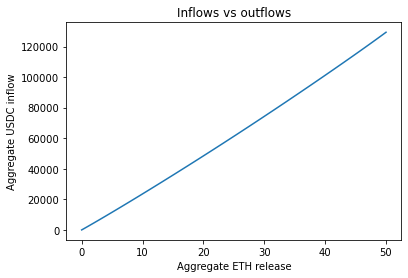

In [35]:
plt.plot(dyvals, dxvals)
plt.title("Inflows vs outflows")
plt.ylabel("Aggregate USDC inflow")
plt.xlabel("Aggregate ETH release")

Text(0.5, 0, 'Aggregate ETH release')

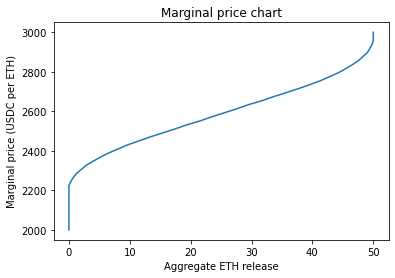

In [36]:
plt.plot(dyvals, pvals)
plt.title("Marginal price chart")
plt.ylabel("Marginal price (USDC per ETH)")
plt.xlabel("Aggregate ETH release")

Text(0, 0.5, 'Effective price (USDC per ETH)')

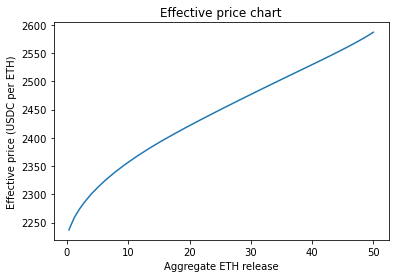

In [37]:
plt.plot(dyvals, [dx/dy if dy>0 else None for dx,dy in zip(dxvals, dyvals)])
plt.title("Effective price chart")
plt.xlabel("Aggregate ETH release")
plt.ylabel("Effective price (USDC per ETH)")

Text(0, 0.5, 'Aggregate ETH release')

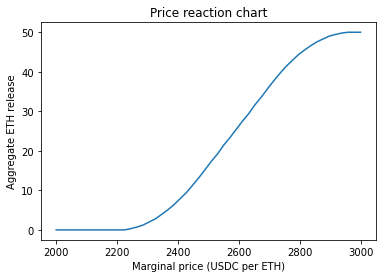

In [38]:
plt.plot(pvals, dyvals)
plt.title("Price reaction chart")
plt.xlabel("Marginal price (USDC per ETH)")
plt.ylabel("Aggregate ETH release")

Text(0, 0.5, 'Aggregate USDC inflow')

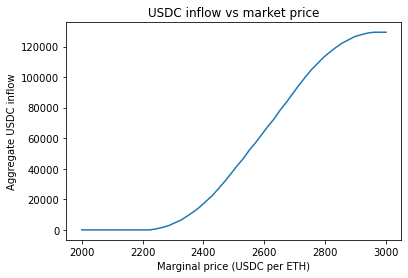

In [39]:
plt.plot(pvals, dxvals)
plt.title("USDC inflow vs market price")
plt.xlabel("Marginal price (USDC per ETH)")
plt.ylabel("Aggregate USDC inflow")

Text(0, 0.5, 'Effective price (USDC per ETH)')

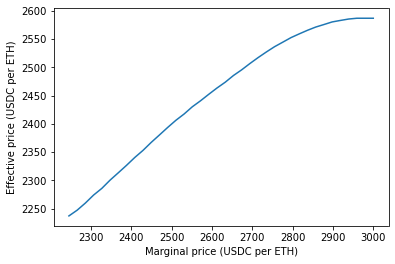

In [40]:
plt.plot(pvals, [dx/dy if dy>0 else None for dx,dy in zip(dxvals, dyvals)])
plt.xlabel("Marginal price (USDC per ETH)")
plt.ylabel("Effective price (USDC per ETH)")